# Experiment 2

#### Problem Statement

Implement Breadth-First Search (BFS) and Depth-First Search (DFS) algorithms in Python to analyze a simple social network. The program aims to explore social connections between users and offer insights into their relationships.
The program should be able to:
- Find groups of users who are directly or indirectly connected to the influencer “Brenda”.
- Determine if there is a path between two users “Sally” and “Ted”

Use the graph as provided below for the assignment: <br>
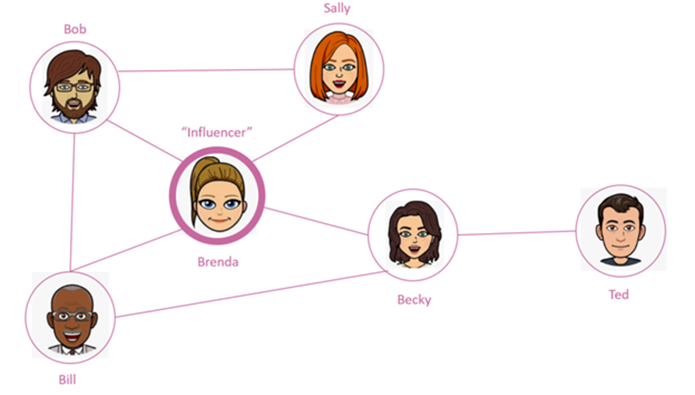

## Pseudocode

**BFS Pseudocode**

```
FUNCTION path_using_bfs(graph, source_node, destination_node):
    Create a queue and ADD source_node to it.
    Create a set called visited and ADD source_node to it.
    Create a dictionary called path and SET path[source_node] to None.

    WHILE queue is NOT empty:
        current_node = REMOVE first element from queue.

        IF current_node is EQUAL to destination_node:
            RETURN the path from source_node to destination_node using the path dictionary.

        FOR EACH neighbor in graph[current_node]:
            IF neighbor is NOT in visited:
                ADD neighbor to visited.
                SET path[neighbor] to current_node.
                ADD neighbor to queue.

    END FOR
    END WHILE

    RETURN None.

END FUNCTION
```

**DFS Pseudocode**

```
FUNCTION path_using_dfs(graph, source_node, destination_node):
    Create a stack and PUSH source_node onto it.
    Create a set called visited and ADD source_node to it.
    Create a dictionary called path and SET path[source_node] to None.

    WHILE stack is NOT empty:
        current_node = POP the top element from stack.

        IF current_node is EQUAL to destination_node:
            RETURN the path from source_node to destination_node using the path dictionary.

        FOR EACH neighbor in graph[current_node]:
            IF neighbor is NOT in visited:
                ADD neighbor to visited.
                SET path[neighbor] to current_node.
                PUSH neighbor onto stack.

        END FOR
    END WHILE

    RETURN None.

END FUNCTION
```

## Code

In [50]:
# importing required libraries
from collections import deque

### Defining the Graph Using Adjacency List

In [51]:
# making the graph
# Adjacency list representation
graph = {
    "Brenda": ["Sally", "Bob", "Becky", "Bill"],
    "Bob": ["Brenda", "Sally", "Bill"],
    "Becky": ["Brenda", "Ted", "Bill"],
    "Bill": ["Brenda", "Bob", "Becky", ],
    "Sally": ["Brenda", "Bob"],
    "Ted": ["Becky"]
}

# Adjacency matrix representation
adjacency_matrix = [
    [0, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 1, 0],
    [1, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0],
    [1, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0]
]

In [52]:
def extract_path(path_dict, source, destination):
    if destination not in path_dict:
        return None
    path = []
    current = destination
    while current is not None:
        path.append(current)
        current = path_dict[current]
    path.reverse()
    return path

### Path Using BFS

In [53]:
def path_using_bfs(graph, source_node, destination_node):
    queue = deque()
    queue.append(source_node)
    visited = set()
    visited.add(source_node)
    path = {}
    path[source_node] = None
    while queue:
        current_node = queue.popleft()
        print("Visited Node", current_node)
        if current_node == destination_node:
            return extract_path(path, source_node, destination_node)
        for neighbor in graph[current_node]:
            if neighbor not in visited:
                visited.add(neighbor)
                path[neighbor] = current_node
                queue.append(neighbor)
    return None

### Path Using DFS

In [54]:
def path_using_dfs(graph, source_node, destination_node):
    stack = deque()
    stack.append(source_node)
    visited = set()
    visited.add(source_node)
    path = {}
    path[source_node] = None
    while stack:
        current_node = stack.pop()
        print("Visited Node", current_node)
        if current_node == destination_node:
            return extract_path(path, source_node, destination_node)
        for neighbor in graph[current_node]:
            if neighbor not in visited:
                visited.add(neighbor)
                path[neighbor] = current_node
                stack.append(neighbor)
    return None

In [56]:
# testing the code
print("BFS")
print(path_using_bfs(graph, "Bob", "Ted"))
print("\n")
print("DFS")
print(path_using_dfs(graph, "Bob", "Sally"))

BFS
Visited Node Bob
Visited Node Brenda
Visited Node Sally
Visited Node Bill
Visited Node Becky
Visited Node Ted
['Bob', 'Brenda', 'Becky', 'Ted']


DFS
Visited Node Bob
Visited Node Bill
Visited Node Becky
Visited Node Ted
Visited Node Sally
['Bob', 'Sally']


## Complexity Analysis

**BFS**
- **Time Complexity:** O(V+E) where V is number of vertices in the graph and E is number of edges in the graph.
- **Space Complexity:** O(V)

**DFS**
- **Time Complexity:** O(V+E) where V is number of vertices in the graph and E is number of edges in the graph.
- **Space Complexity:** O(V)